Thực hành 3: Biến đổi hình học

1.Viết chương trình biến đổi ảnh

1.1 Chọn đối tượng trong ảnh

(1427, 2100, 3)


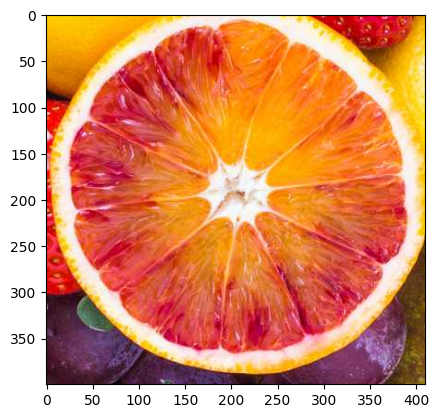

In [1]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
bmg = data [800:1200, 570:980]

print (data.shape)
iio.imsave('orange.jpg', bmg)
plt.imshow (bmg)
plt.show ()

1.2. Tịnh tiến đơn

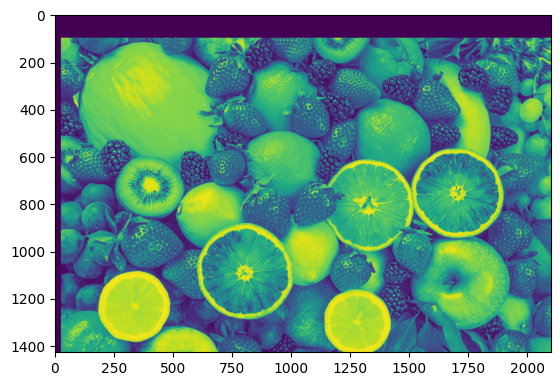

In [3]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg', mode = 'F')
bdata = nd.shift (data, (100, 25))

plt.imshow (bdata)
plt.show ()


1.3. Thay đổi kích thước ảnh

(1427, 2100, 3)
(2854, 4200, 6)
(2854, 4200, 3)


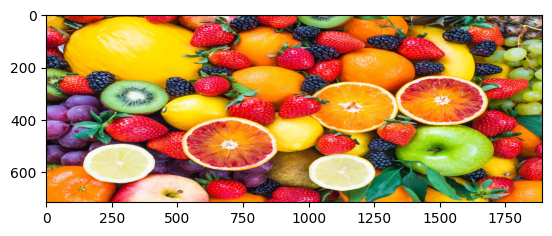

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread('fruit.jpg')
print (data.shape)
bdata = nd.zoom(data, 2)
print (bdata.shape)
data2 = nd.zoom (data, (2, 2, 1))
print (data2.shape)
data3 = nd.zoom(data, (0.5, 0.9, 1))
plt.imshow (data3)
plt.show ()

1.4. Xoay ảnh

(1427, 2100, 3)


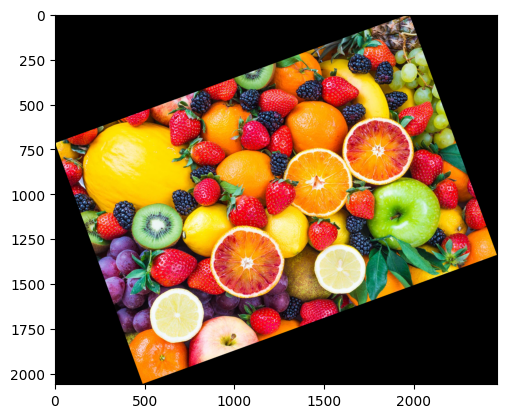

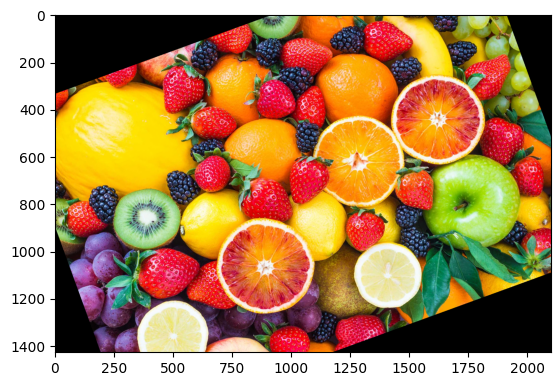

In [6]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('fruit.jpg')
print (data.shape)
d1 = nd.rotate (data, 20)
plt.imshow (d1)
plt.show ()
d2 = nd.rotate (data, 20, reshape=False)
plt.imshow (d2)
plt.show ()

1.5. Dilation và Erosion

(309, 515)


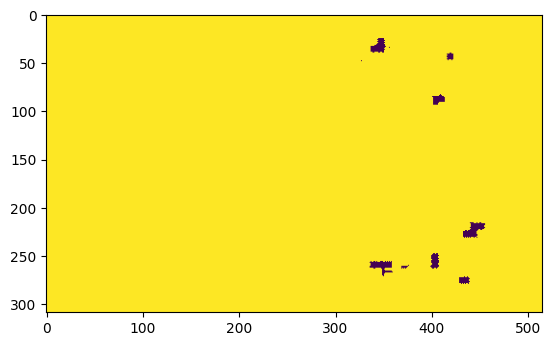

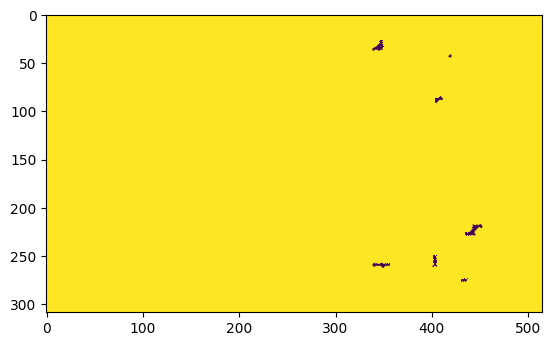

In [9]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('world_cup.jpg', mode = 'F')
print (data.shape)
dl = nd.binary_dilation(data)
plt.imshow (dl)
plt.show ()
d2 = nd.binary_dilation(data, iterations=3)
plt.imshow (d2)
plt.show ()


1.6. Coordinate Mapping


(309, 515)


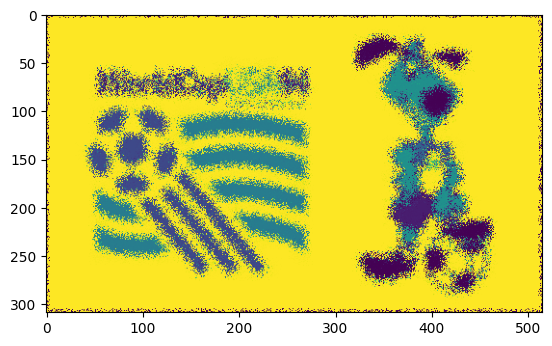

In [10]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
data = iio.imread('world_cup.jpg', mode = 'F')
print (data.shape)
V, H= data.shape
M = np.indices((V, H))
d = 5
q=2 * d * np.random.ranf (M.shape) - d
mp = (M + q).astype (int)
dl = nd.map_coordinates (data, mp)
plt.imshow (dl)
plt.show ()

1.7. Biến đổi chung (Generic Transformation)

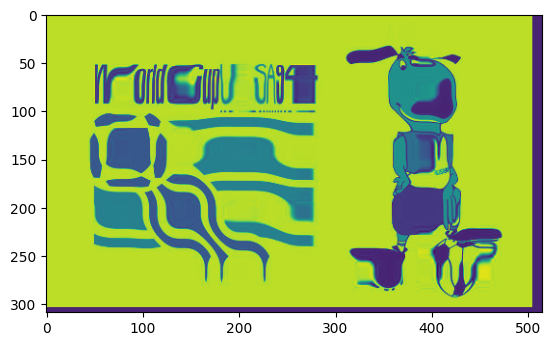

In [11]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
def GeoFun (outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread('world_cup.jpg', mode = 'F')

dl = nd.geometric_transform(data, GeoFun)
plt.imshow (dl)
plt.show ()

Bài tập tăng cường

Bài 1: 

Chọn ảnh quả kiwi bất kì .
Tịnh tiến quả kiwi 50 pixel sang phải và 30 pixel xuống dưới.
Áp dụng hiệu ứng sóng (wave effect) lên quả kiwi bằng cách sử dụng biến đổi tọa độ (map_coordinates) với hàm sin.
Lưu ảnh kết quả vào file kiwi_wave.jpg

(1414, 2119, 3)


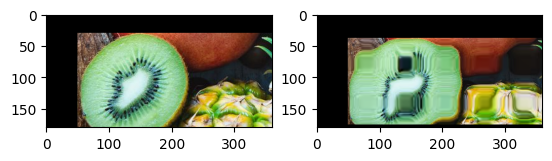

In [9]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pylab as plt
def GeoFun (outcoord):
    a = 10 * np.cos(outcoord[0]/10.0) + outcoord[0]
    b = 10 * np.cos(outcoord[1]/10.0) + outcoord[1]
    return a, b

data = iio.imread("exercise/colorful-ripe-tropical-fruits.jpg")
bmg = data[920:1100, 390:750]
bdata = nd.shift(bmg, (30, 50, 0))
d1 = np.stack([nd.geometric_transform(bdata[:,:,i], GeoFun) for i in range(3)], axis = 2)

iio.imsave('kiwi_wave.jpg', d1.astype(np.uint8)) 

print(data.shape)
iio.imsave('kiwi.jpg', bdata)
plt.subplot(1, 2, 1)
plt.imshow(bdata)
plt.subplot(1, 2, 2)
plt.imshow(d1) 
plt.show() 

Bài 2: 

Chọn quả đu đủ và dưa hấu từ google.
Đổi màu đu đủ thành gradient từ đỏ sang xanh lá, và dưa hấu thành gradient từ vàng sang tím.
Ghép hai quả lên một nền trong suốt (alpha channel) và lưu dưới dạng PNG.

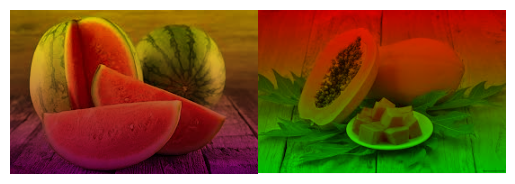

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pylab as plt

data = iio.imread("dudu.jpg")
data1 = iio.imread("duahau.jpg")

def doimau(img, mau1, mau2):
    h = img.shape[0]
    ti_le = np.linspace(0, 1, h).reshape(h, 1, 1)
    mau1 = np.array(mau1).reshape(1, 1, 3)
    mau2 = np.array(mau2).reshape(1, 1, 3)
    maumoi = mau1 + (mau2 - mau1) * ti_le
    return (img / 255 * maumoi).astype(np.uint8)

data_n = doimau(data, [255, 0, 0], [0, 255, 0])
data1_n = doimau(data1, [255, 255, 0], [128, 0, 128])

h = max(data.shape[0], data1.shape[0])
w = data.shape[1] + data1.shape[1]
kq = np.zeros((h, w, 4), dtype=np.uint8)

kq[0:data1.shape[0], 0:data1.shape[1], :3] = data1_n
kq[0:data1.shape[0], 0:data1.shape[1], 3] = 255

x = data1.shape[1]
kq[0:data.shape[0], x:x+data.shape[1], :3] = data_n
kq[0:data.shape[0], x:x+data.shape[1], 3] = 255

iio.imwrite("ketqua.png", kq)
plt.imshow(kq)
plt.axis("off")
plt.show()



Bài 3: 

Chọn ảnh núi và thuyền .
Xoay cả hai đối tượng 45 độ, giữ kích thước ban đầu (reshape=False).
Tạo hiệu ứng phản chiếu dọc (vertical mirror) cho cả hai đối tượng sau khi xoay.
Ghép cả hai đối tượng lên một canvas trắng và lưu vào mountain_boat_mirror.jpg

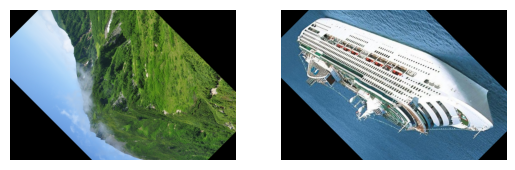

In [2]:
import numpy as np
import imageio.v2 as iio
import matplotlib.pyplot as plt
import scipy.ndimage as nd

data = iio.imread("nui.jpg")
data1 = iio.imread("thuyen.jpg")

data = nd.rotate(data, 45, reshape=False)
data1 = nd.rotate(data1, 45, reshape=False)

data = np.flipud(data)
data1 = np.flipud(data1)

plt.subplot(1, 2, 1)
plt.imshow(data)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(data1)
plt.axis('off')

plt.savefig("mountain_boat_mirror.jpg")
plt.show()


Bài 4: 

Chọn ngôi chùa bất kì.
Phóng to ngôi chùa lên 5 lần.
Áp dụng một biến đổi hình học tùy chỉnh (geometric transform) để tạo hiệu ứng "uốn cong" (warping) ngôi chùa.
Lưu ảnh kết quả vào pagoda_warped.jpg.

Kích thước gốc: (4095, 2720, 3)
Kích thước sau khi phóng to: (20475, 13600, 3)


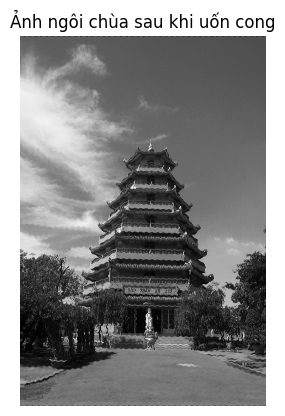

In [4]:
import numpy as np
import scipy.ndimage as nd
import imageio.v2 as iio
import matplotlib.pyplot as plt

def warp_function(output_coords):
    y, x = output_coords
    new_y = y + 20 * np.sin(x / 50.0)
    new_x = x + 20 * np.sin(y / 50.0)
    return new_y, new_x

data = iio.imread("pagoda.jpg")
print("Kích thước gốc:", data.shape)
z_data = nd.zoom(data, (5, 5, 1))
print("Kích thước sau khi phóng to:", z_data.shape)

gray = np.mean(z_data, axis=2)
warped = nd.geometric_transform(gray, warp_function)
plt.imshow(warped, cmap='gray')
plt.axis('off')
plt.title("Ảnh ngôi chùa sau khi uốn cong")
plt.show()
iio.imsave("pagoda_wrapped.jpg", warped.astype(np.uint8))
